# Comparison with Observations: 
## Mean Absolute Percent Error and Normilized Forecast Metric Calculations

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of histograms](#2-comparison-of-histograms)

3. [Seasonal and Monthly 95 percentage level](#3-seasonal-and-monthly-95-percentage-level)

4. [Mean comparison](#4-mean-comparison)

5. [Bias of a different models]()

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

FDB5 binary library not present on system, disabling FDB support.


#### ICON, ngc3028, lra

In [2]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly", regrid = "r100")
icon_ngc3028    = reader.retrieve()
icon_ngc3028    = icon_ngc3028.drop_vars('depth_full')
icon_ngc3028    = icon_ngc3028.isel(time=slice(1, -1))
#icon_ngc3028

#### IFS, tco2559-ng5, lra

In [3]:
reader              = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly", regrid = "r100") 
ifs_tco2559_ng5     = reader.retrieve()
ifs_tco2559_ng5     = ifs_tco2559_ng5.drop_vars('plev')
ifs_tco2559_ng5     = ifs_tco2559_ng5.isel(time=slice(1, -1))
ifs_tco2559_ng5  

<xarray.Dataset>
Dimensions:  (time: 11, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01 2020-03-01 ... 2020-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: plev
Data variables: (12/20)
    2t       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-07-06 03:08:17 coordinates adjusted by AQUA fixer;\n

#### IFS, tco1279-orca025-cycle3, lra

In [4]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly", regrid = "r100")
ifs_tco1279_orca025     = reader.retrieve()
ifs_tco1279_orca025     = ifs_tco1279_orca025.drop_vars('plev')
ifs_tco1279_orca025

<xarray.Dataset>
Dimensions:  (time: 60, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: plev
Data variables: (12/19)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-07-06 02:28:10 coordinates adjusted by AQUA fixer;\n

#### MSWEP, monthly 

In [5]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)
#mswep_mon

#### Initialization of the diagnostic

In [4]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)

## 2. Comparison of histograms

In [7]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028)
hist_icon_ngc3028

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.25e-05 3.75e-05 ... 0.0004875
    width          (center_of_bin) float64 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
Data variables:
    counts         (center_of_bin) float64 1.835e+05 5.816e+04 ... 34.0 24.0
    frequency      (center_of_bin) float64 0.3921 0.1243 ... 7.265e-05 5.129e-05
    pdf            (center_of_bin) float64 1.569e+04 4.971e+03 ... 2.906 2.051

In [8]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5)
hist_ifs_tco2559_ng5

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.25e-05 3.75e-05 ... 0.0004875
    width          (center_of_bin) float64 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
Data variables:
    counts         (center_of_bin) float64 3.725e+04 8.887e+03 ... 43.0 37.0
    frequency      (center_of_bin) float64 0.4708 0.1123 ... 0.0005435 0.0004676
    pdf            (center_of_bin) float64 1.883e+04 4.493e+03 ... 21.74 18.71
Attributes:
    history:  2023-07-06 02:28:07 coordinates adjusted by AQUA fixer;\n2023-0...

In [9]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025)
hist_ifs_tco1279_orca025

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.25e-05 3.75e-05 ... 0.0004875
    width          (center_of_bin) float64 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
Data variables:
    counts         (center_of_bin) float64 1.518e+05 5.665e+04 ... 3.0 3.0
    frequency      (center_of_bin) float64 0.3514 0.1311 ... 6.944e-06 6.944e-06
    pdf            (center_of_bin) float64 1.406e+04 5.245e+03 ... 0.2778 0.2778
Attributes:
    history:  2023-07-06 02:28:10 coordinates adjusted by AQUA fixer;\n2023-0...

In [ ]:
hist_mswep_mon = diag.histogram(mswep_mon)
hist_mswep_mon

#### Units of precipitation: m  s**-1

{<Axes: title={'center': 'Tropical precipitation, monthly, 100km res'}, xlabel='Precipitation, [m s**-1]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

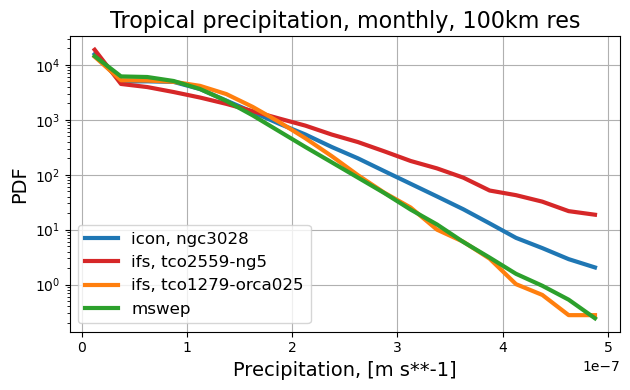

In [11]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="m s**-1",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="m s**-1",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="m s**-1",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="m s**-1",
                legend='mswep',
                plot_title='Tropical precipitation, monthly, 100km res', loc='lower left')

#### Units of precipitation: m  day**-1

{<Axes: title={'center': 'Tropical precipitation, monthly, 100km res'}, xlabel='Precipitation, [m day**-1]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

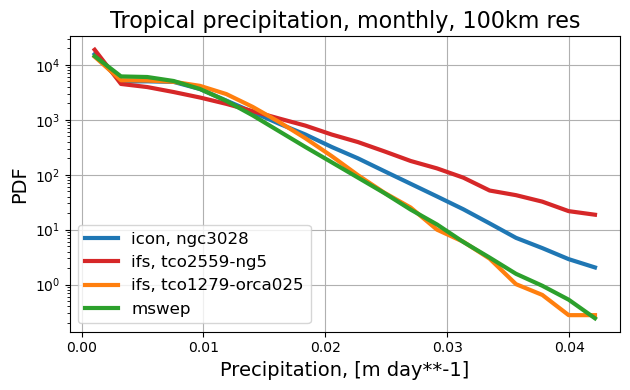

In [12]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="m day**-1",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="m day**-1",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="m day**-1",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="m day**-1",
                legend='mswep',
                plot_title='Tropical precipitation, monthly, 100km res', loc='lower left')

## 3. Seasonal and monthly 95 percentage level 

### Calculations of a threshold precipitation value in a different units 

In [13]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

#### By default, the function calculates the 95 percent level with 10% relative error and returns 
 - threshold value of precipitation 
 - units of precipitation 
 - final value of percentage level (including error)

In [14]:
diag.get_95percent_level(icon_ngc3028)

(0.0001875, 'kg m**-2 s**-1', 0.9453451720785118)

Users can set the relative error on a percentage level

In [15]:
diag.get_95percent_level(ifs_tco2559_ng5, original_hist = hist_ifs_tco2559_ng5, rel_error = 0.10)

(0.00024375000000000004, 'kg m**-2 s**-1', 0.9492787519437667)

User can modify the units of the precipitation 

In [16]:
diag.get_95percent_level(ifs_tco1279_orca025, new_unit='m/s')

(2.0078124999999998e-07, 'm/s', 0.947272781986912)

User can also modify the default percentage level 

In [17]:
diag.get_95percent_level(mswep_mon, value=0.9)

(0.00017597656249999997, 'kg m**-2 s**-1', 0.8972933138848432)

### Seasonal Plot of 60 percent level

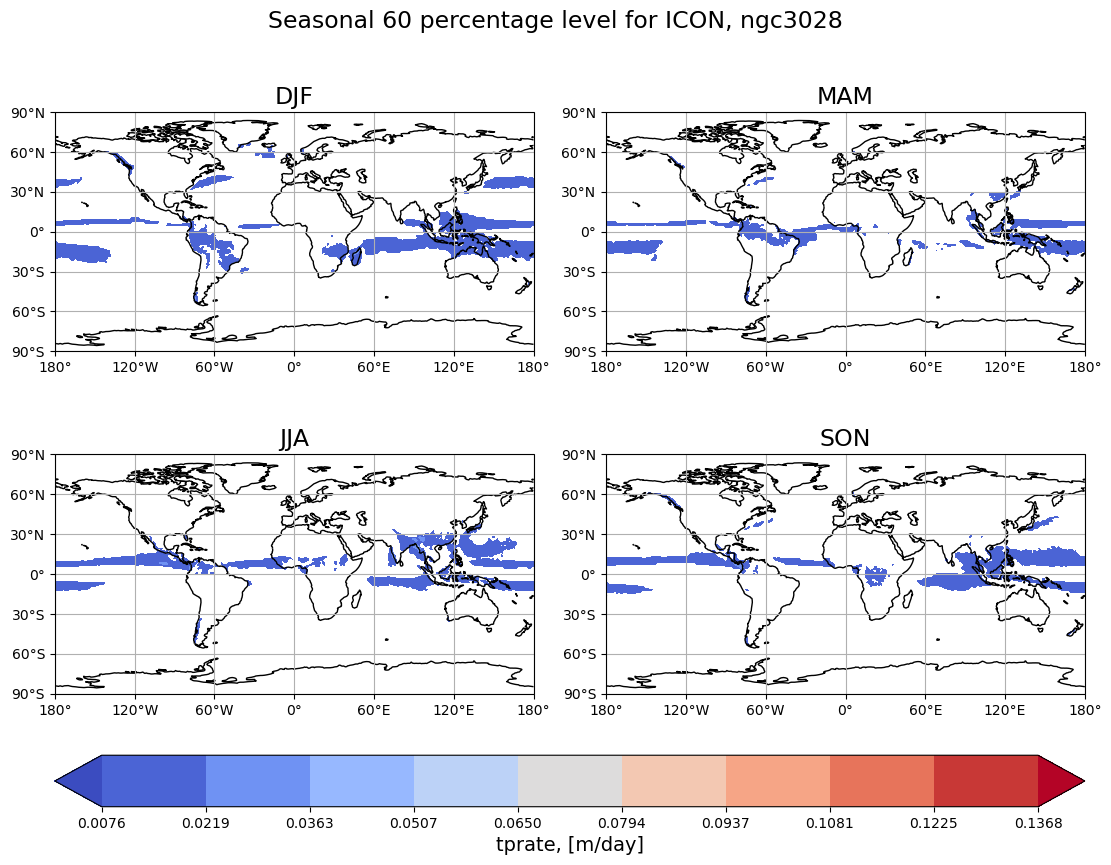

In [18]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028, new_unit='m/day',  trop_lat=90, value=0.6, 
                   plot_title='Seasonal 60 percentage level for ICON, ngc3028')

### Monthly Plot of 70 percent level

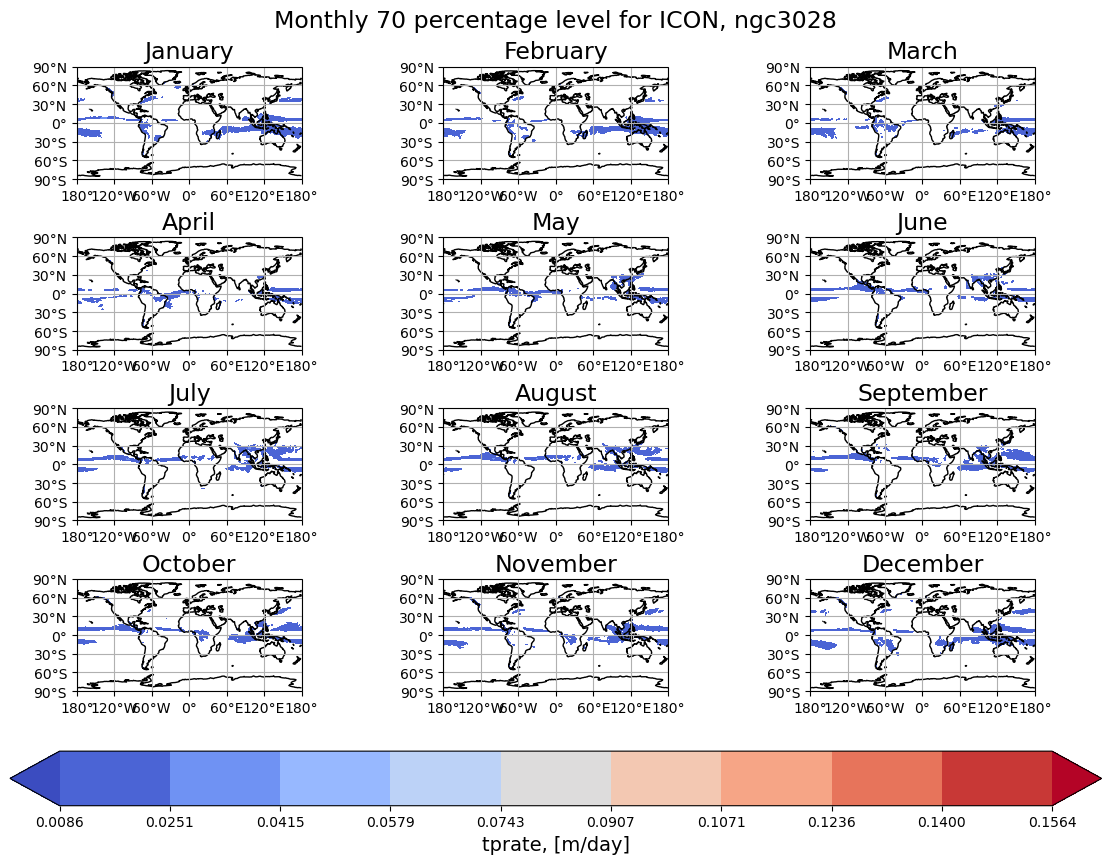

In [25]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028,  seasons=False,  trop_lat=90, new_unit='m/day', value=0.7, 
                    plot_title='Monthly 70 percentage level for ICON, ngc3028')

### Monthly Plot of 85 percent level

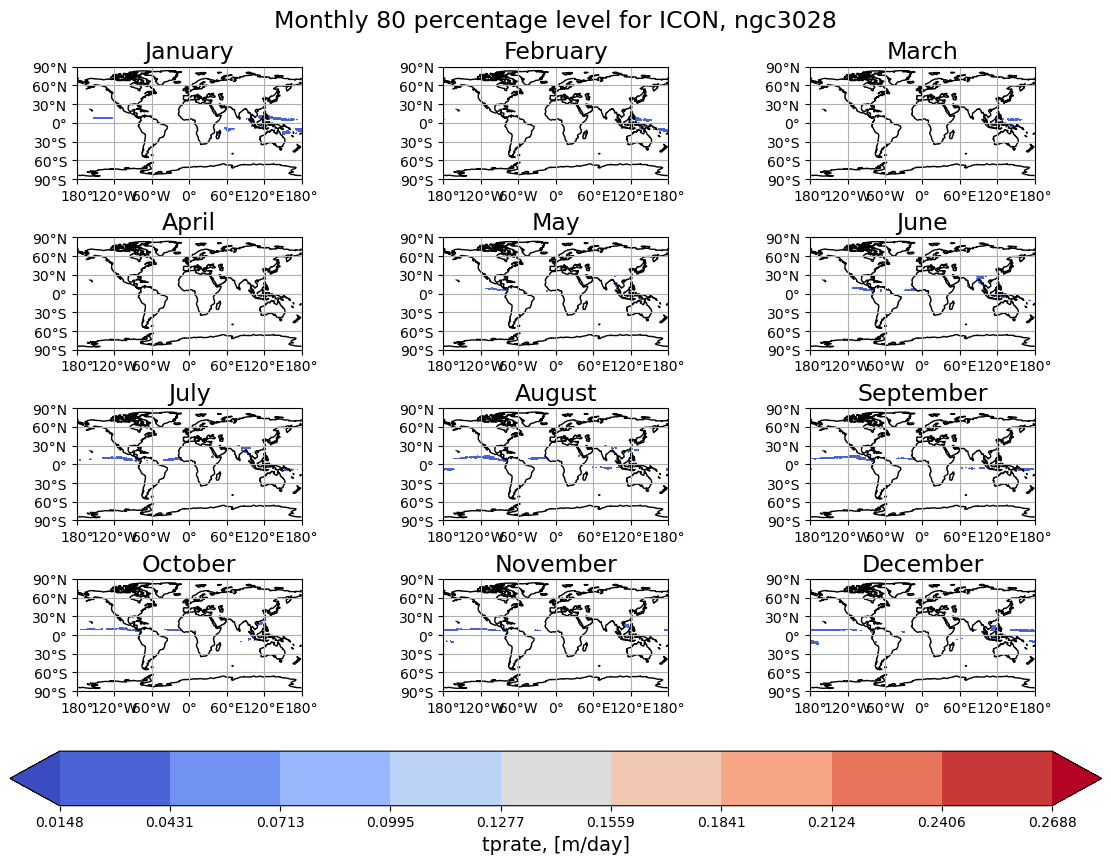

In [26]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028,  seasons=False,  trop_lat=90,  new_unit='m/day', value=0.85,
                    plot_title='Monthly 80 percentage level for ICON, ngc3028')

## 4. Mean comparison

### 4.1 Along longitude

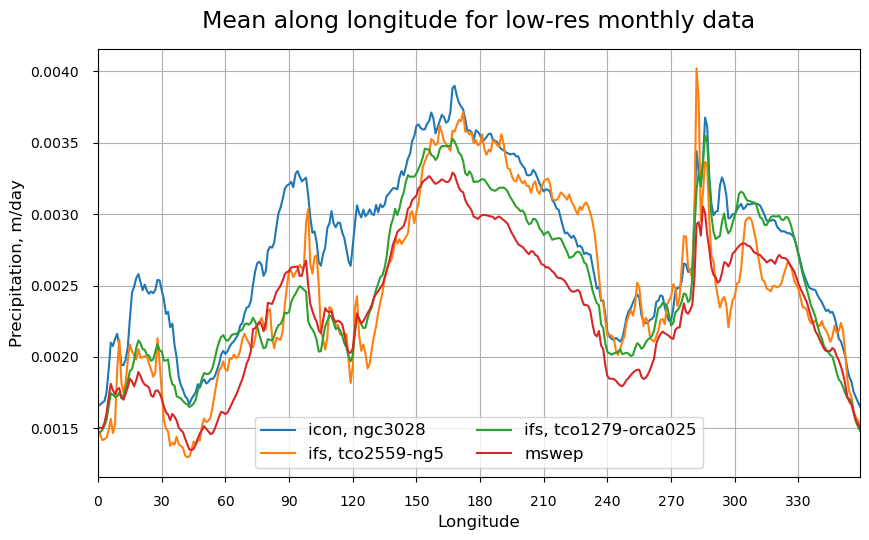

In [22]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon_ngc3028,                   coord='lon',  
                                legend='icon, ngc3028',   color='tab:blue', figsize=1.1,    new_unit = 'm/day' )
add = diag.mean_and_median_plot(ifs_tco2559_ng5,             fig=add,    coord='lon',  
                                legend='ifs, tco2559-ng5',    color='tab:orange',           new_unit = 'm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,       fig=add,    coord='lon',  
                                legend='ifs, tco1279-orca025', color='tab:green',           new_unit = 'm/day')

add = diag.mean_and_median_plot(mswep_mon,       fig=add,    coord='lon',  
                                legend='mswep', color='tab:red', loc='lower center',        new_unit = 'm/day',
                                plot_title='Mean along longitude for low-res monthly data')

### 4.2 Along latitude

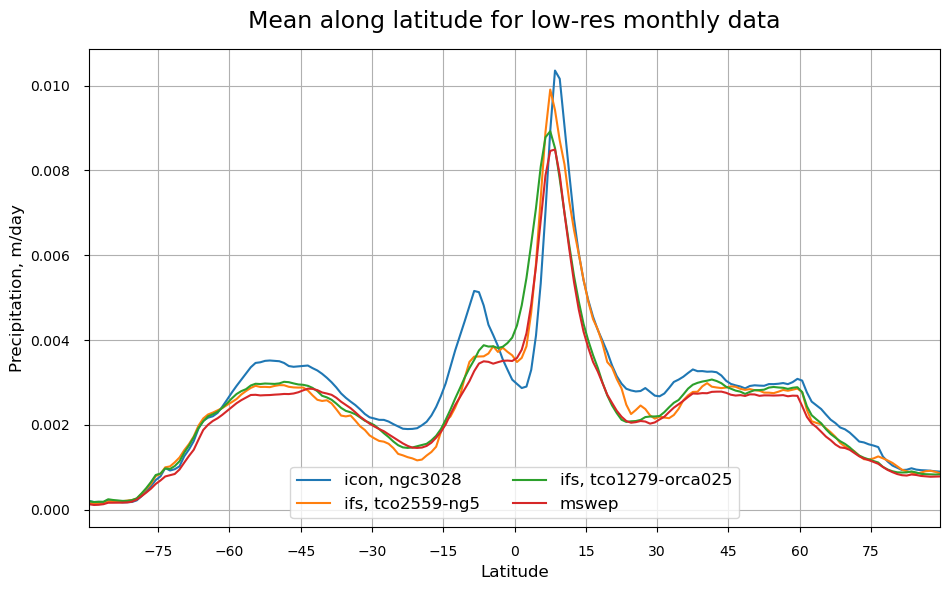

In [23]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon_ngc3028,                           coord='lat',  
                                legend='icon, ngc3028',         color='tab:blue',       figsize=1.2, new_unit = 'm/day' )
add = diag.mean_and_median_plot(ifs_tco2559_ng5,            fig=add,    coord='lat',  
                                legend='ifs, tco2559-ng5',      color='tab:orange',     new_unit = 'm/day' )

add = diag.mean_and_median_plot(ifs_tco1279_orca025,        fig=add,    coord='lat',  
                                legend='ifs, tco1279-orca025',  color='tab:green',      new_unit = 'm/day' )

add = diag.mean_and_median_plot(mswep_mon,                  fig=add,    coord='lat',  
                                legend='mswep',                 color='tab:red',        loc='lower center', new_unit = 'm/day', 
                                plot_title='Mean along latitude for low-res monthly data')

## 5.. Calculation of a bias 

In [ ]:
icon_ngc3028['tprate'], dataset_2 = ifs_tco2559_ng5

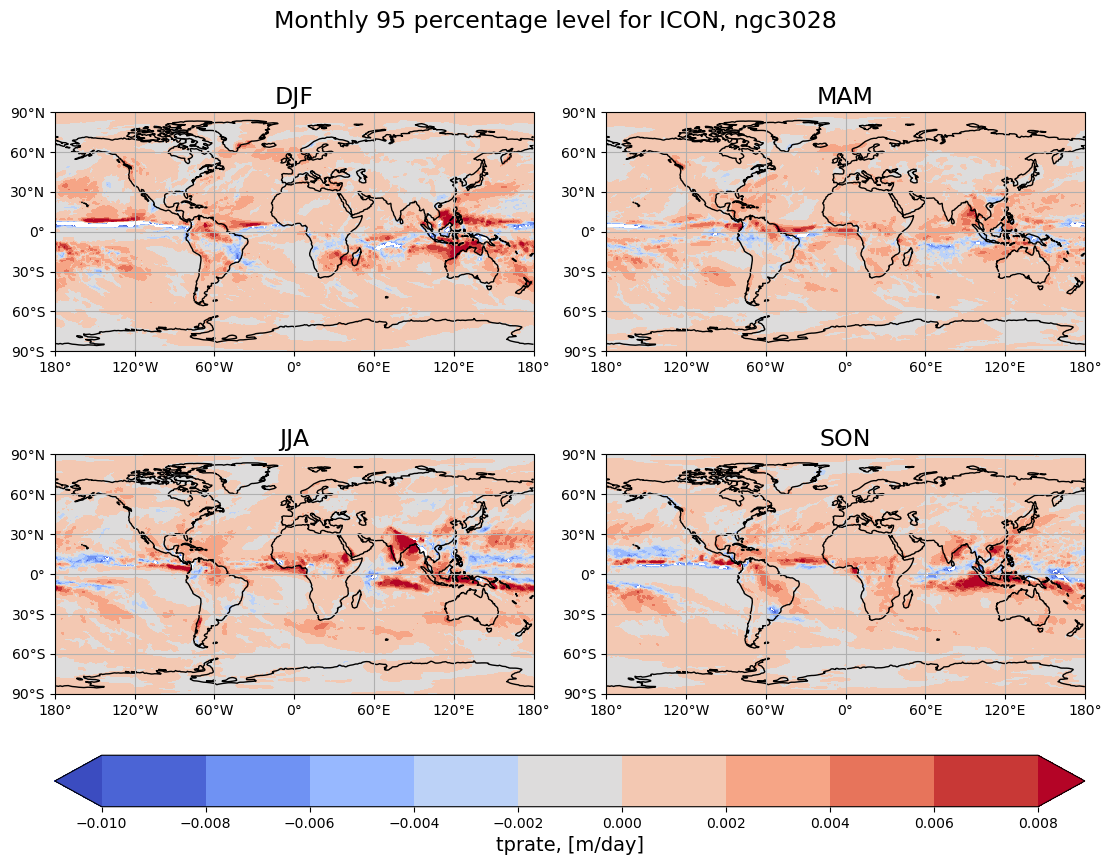

In [5]:
diag.plot_bias(icon_ngc3028, dataset_2 = ifs_tco2559_ng5, seasons=True, new_unit='m/day',  trop_lat=90, vmin=-0.01, vmax=0.01,
                    plot_title='Monthly 95 percentage level for ICON, ngc3028')

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


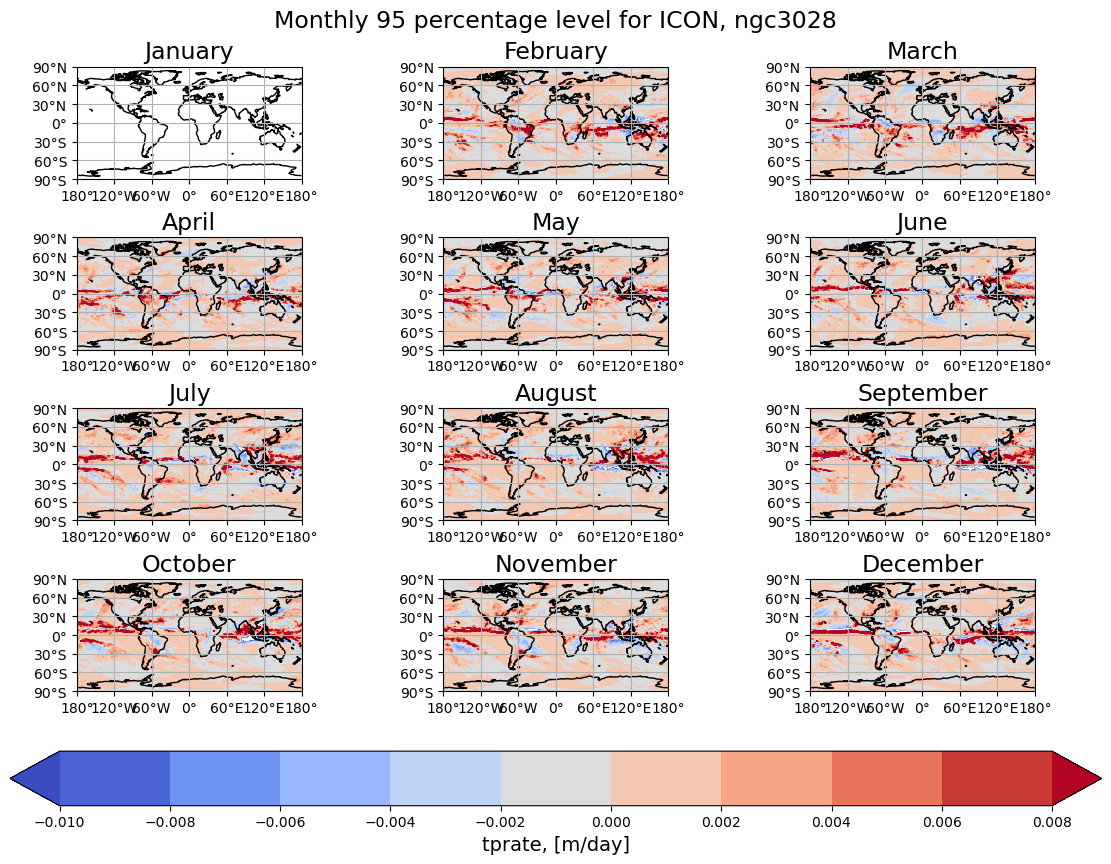

In [7]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = icon_ngc3028, seasons=False, new_unit='m/day',  trop_lat=90, vmin=-0.01, vmax=0.01,
                    plot_title='Monthly 95 percentage level for ICON, ngc3028')

#

##### The end